So here I basically follow what Jackie did in class but I just change the string for input a bit, so that it can be better extended to other stocks.

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Let's make a standard input as below
function = "TIME_SERIES_DAILY"
symbol="300750.SZ"
outputsize="full"
apikey="T6VX725RGZZJFF8P"
# Then the web link should be as below:
fulllink = "https://www.alphavantage.co/query?function="+function+"&symbol="+symbol+"&outputsize="+outputsize+"&apikey="+apikey
fulllink

'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=300750.SZ&outputsize=full&apikey=T6VX725RGZZJFF8P'

And then as usual, we should test the API and see whether it is working.

In [ ]:
# Here we check whether our full link is working as expected.
res = requests.get(fulllink)
res_json = res.json()
res

<Response [200]>

It turns out OK.

Then, I am particularly interested in the daily change of the stock price, which is not provided. Also, this specific stock is of particular attention in China right now, as it is a world leader in renewable energy. So the China market is crazy about this stock in recent months.

In [ ]:
df = pd.DataFrame.from_dict(res_json['Time Series (Daily)']).T
df.index = pd.to_datetime(df.index)
df = df.astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 851 entries, 2021-09-14 to 2018-06-11
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    851 non-null    float32
 1   2. high    851 non-null    float32
 2   3. low     851 non-null    float32
 3   4. close   851 non-null    float32
 4   5. volume  851 non-null    float32
dtypes: float32(5)
memory usage: 23.3 KB


A good illustration of the particular attention is its price.

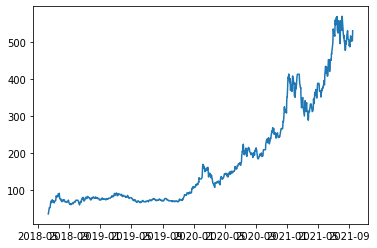

In [ ]:
plt.plot(df["4. close"])

Let's calculate if you buy it from the very first day it was listed, which is also where it had the lowest price, the maximal profit you can make.

In [ ]:
df["4. close"].describe()

count    851.000000
mean     182.779114
std      140.738815
min       36.200001
25%       75.285000
50%      117.349998
75%      252.540001
max      569.000000
Name: 4. close, dtype: float64

In [ ]:
(569.000000 - 36.200001) / 36.200001

14.7182316099936

So basically, you will get more than 14 times of the money you invest in it. This is remarkable in a short period like only 849 trading day.

In [ ]:
df["6. daily change"] = df["4. close"] - df["1. open"]
df["7. daily change rate"] = df["6. daily change"] / df["1. open"]
df

,1. open,2. high,3. low,4. close,5. volume,6. daily change,7. daily change rate
2021-09-14,507.119995,541.000000,502.920013,529.900024,23383660.0,22.780029,0.044920
2021-09-13,502.100006,512.099976,496.000000,502.799988,8968970.0,0.699982,0.001394
2021-09-10,493.440002,503.779999,490.679993,502.100006,11296940.0,8.660004,0.017550
2021-09-09,509.500000,518.979980,490.799988,507.200012,11016210.0,-2.299988,-0.004514
2021-09-08,519.000000,523.580017,500.000000,503.000000,9739400.0,-16.000000,-0.030829
...,...,...,...,...,...,...,...
2018-06-15,53.000000,53.000000,53.000000,53.000000,256510.0,0.000000,0.000000
2018-06-14,48.180000,48.180000,48.180000,48.180000,74270.0,0.000000,0.000000
2018-06-13,43.799999,43.799999,43.799999,43.799999,45030.0,0.000000,0.000000
2018-06-12,39.820000,39.820000,39.820000,39.820000,26580.0,0.000000,0.000000


So basically, we get data from 2018 when the stock was first listed until the last trading day. After our computation of the daily change, we can have a look at what it is like.

In [ ]:
df["7. daily change rate"].describe()

count    851.000000
mean       0.001818
std        0.028852
min       -0.092418
25%       -0.014453
50%        0.000000
75%        0.014036
max        0.199867
Name: 7. daily change rate, dtype: float64

A thing that is special about the China market is that it limits the daily price change. For high-tech companies, thier stock can at most go up for 20% a day, and for other Chinese companies, the rate is only 10%. Trading will be paused after reaching the limitation, so the actual rate is slightly different. In our case, the maximal price change in a day is 19.9867%, which is consistent with what it should be.

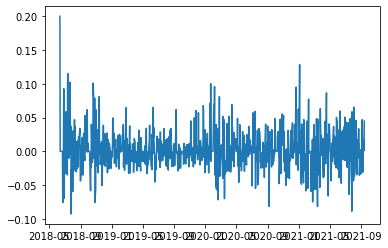

In [ ]:
plt.plot(df["7. daily change rate"])

However, the this plot of daily change rate suggest a quite different world. It seems most changes are still fluctuating around 0%. The mean of the change rate is only slightly above 0, which is 0.18%.

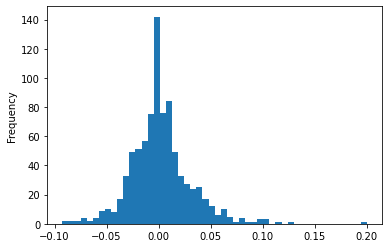

In [ ]:
df["7. daily change rate"].plot.hist(bins=50)

Then the question is what drives the increase in price of this stock? We can cut it into two part: 
1. the trading day with decreased prices and 
2. the trading day with increased prices.

In [ ]:
df_increase = df[df["7. daily change rate"] > 0]
df_increase["7. daily change rate"] = df_increase["6. daily change"] / df_increase["1. open"]
df_increase.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,1. open,2. high,3. low,4. close,5. volume,6. daily change,7. daily change rate
count,393.000000,393.000000,393.000000,393.000000,393.0,393.000000,393.000000
mean,183.800659,190.630783,181.815262,188.362442,16261891.0,4.561681,0.023847
std,139.079620,144.694229,137.229233,142.927231,9989288.0,6.162724,0.023617
min,30.170000,36.200001,30.170000,36.200001,78830.0,0.010002,0.000111
25%,74.589996,76.949997,74.089996,76.199997,9512620.0,0.860001,0.007759
50%,119.010002,125.080002,117.860001,123.599998,14125110.0,2.010002,0.015755
75%,261.000000,267.500000,255.550003,264.820007,19801490.0,6.099991,0.033718
max,560.000000,579.599976,556.109985,569.000000,69982000.0,46.000000,0.199867


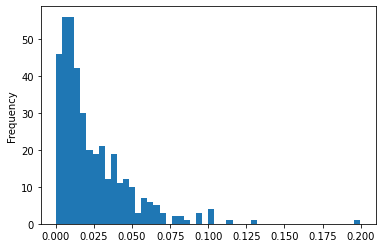

In [ ]:
df_increase["7. daily change rate"].plot.hist(bins=50)

In [ ]:
df_decrease = df[df["7. daily change rate"] <= 0]
df_decrease["7. daily change rate"] = df_decrease["6. daily change"] / df_decrease["1. open"]
df_decrease.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,1. open,2. high,3. low,4. close,5. volume,6. daily change,7. daily change rate
count,458.000000,458.000000,458.000000,458.000000,458.0,458.000000,458.000000
mean,181.502762,183.285431,175.772476,177.987869,13400692.0,-3.514869,-0.017085
std,142.098175,143.770752,136.547821,138.810837,11288685.0,5.573072,0.017160
min,39.820000,39.820000,39.820000,39.820000,0.0,-48.020020,-0.092418
25%,75.292501,76.132502,73.832499,74.284998,6752925.0,-3.647505,-0.024951
50%,115.299999,117.274998,111.685001,114.865002,12019520.0,-1.529999,-0.012981
75%,245.855000,246.450005,236.955002,242.600002,17650045.0,-0.400002,-0.003694
max,567.000000,582.200012,546.530029,557.000000,128170600.0,0.000000,0.000000


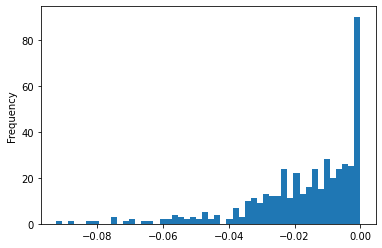

In [ ]:
df_decrease["7. daily change rate"].plot.hist(bins=50)

And here we may realise that there is a total of 391 trading day with price increases but there are 458 trading days showing decreased prices. This is quite interesting. And what makes a difference is actually, when the price goes low, the decrease are mostly close to 0, which is not the case when the price goes up. So I am up to figure whether this happens to other stocks. 

Here I acquire a list of 50 stocks from the SSE Science and Technology Innovation Board 50 Index according to [Sina Finance](http://vip.stock.finance.sina.com.cn/corp/go.php/vII_NewestComponent/indexid/399673.phtml). These companies are regarded as among most potential companies in the Shenzhen stock market.


In [ ]:
company_list = ['300001.SZ','300037.SZ','300595.SZ','300759.SZ','300896.SZ',
        '300773.SZ','300677.SZ','300558.SZ','300296.SZ','300009.SZ',
        '300058.SZ','300223.SZ','300661.SZ','300782.SZ','300567.SZ',
        '300207.SZ','300748.SZ','300142.SZ','300347.SZ','300760.SZ',
        '300601.SZ','300750.SZ','300122.SZ','300015.SZ','300253.SZ',
        '300003.SZ','300413.SZ','300316.SZ','300274.SZ','300115.SZ',
        '300618.SZ','300146.SZ','300676.SZ','300433.SZ','300408.SZ',
        '300450.SZ','300136.SZ','300073.SZ','300496.SZ','300014.SZ',
        '300418.SZ','300383.SZ','300033.SZ','300251.SZ','300059.SZ',
        '300017.SZ','300088.SZ','300070.SZ','300124.SZ','300315.sz']
len(company_list)

50

In [ ]:
def time_series_data_cal(stock):
  full_link_qc50 = "https://www.alphavantage.co/query?function="+function+"&symbol="+stock+"&outputsize="+outputsize+"&apikey="+apikey
  res = requests.get(full_link_qc50)
  res_json= res.json()
  df = pd.DataFrame.from_dict(res_json['Time Series (Daily)']).T
  df.index = pd.to_datetime(df.index)
  df = df.astype('float32')
  df["6. daily change"] = df["4. close"] - df["1. open"]
  df["7. daily change rate"] = df["6. daily change"] / df["1. open"]
  return df

time_series_data_cal('300001.SZ')

,1. open,2. high,3. low,4. close,5. volume,6. daily change,7. daily change rate
2021-09-14,29.400000,30.680000,29.219999,29.629999,25518520.0,0.230000,0.007823
2021-09-13,29.100000,29.879999,28.889999,29.450001,13976350.0,0.350000,0.012028
2021-09-09,29.830000,30.260000,28.940001,29.330000,19242310.0,-0.500000,-0.016762
2021-09-08,30.350000,30.760000,29.799999,30.020000,15389320.0,-0.330000,-0.010873
2021-09-07,30.400000,30.969999,29.559999,30.590000,21794470.0,0.190001,0.006250
...,...,...,...,...,...,...,...
2009-11-06,39.630001,40.400002,38.250000,38.910000,3378.0,-0.720001,-0.018168
2009-11-05,38.029999,40.980000,37.509998,39.599998,5352.0,1.570000,0.041283
2009-11-04,38.000000,38.900002,37.230000,38.020000,4076.0,0.020000,0.000526
2009-11-03,38.200001,39.360001,36.150002,36.900002,6599.0,-1.299999,-0.034031


In [ ]:
import time
price_list = []
company_list_unchecked = company_list
while len(company_list_unchecked) > 0:
  shortlist = company_list_unchecked[0:4]
  del company_list_unchecked[0:4]
  for comp in shortlist:
    try:
      price_list.append(time_series_data_cal(comp))
    except:
      print(comp)
  # this is because Alpha Vantage only allows 5 requests per minute
  time.sleep(60)
  continue

300759.SZ


In [ ]:
len(company_list_unchecked)

0

In [ ]:
len(price_list)

49

Here there might be some problem with Alpha Vantage's China data. It seems that if there are more than 5 requests, they will tend to reject all that follows. But anyway, we can analyse what we have.

In [ ]:
change_table = []
for num in range(len(price_list)):
  stock_code = company_list[num]
  price = price_list[num]
  total_trading_day = price["7. daily change rate"].count()
  increase_count = price[price["7. daily change rate"] > 0]["7. daily change rate"].count()
  decrease_count = price[price["7. daily change rate"] <= 0]["7. daily change rate"].count()
  diff = increase_count - decrease_count
  zip = [stock_code, total_trading_day, increase_count, decrease_count, diff]
  change_table.append(zip)
change_table = pd.DataFrame(change_table)
change_table.columns = ["Stock Code", "Total Trading Day", "Increase Count", "Decrease Count", "Count Difference"]
change_table["Count Difference"].describe()

count     49.000000
mean    -185.346939
std      139.890813
min     -611.000000
25%     -264.000000
50%     -166.000000
75%     -101.000000
max       29.000000
Name: Count Difference, dtype: float64

The results above show that most of the companies we investigate 
has fewer days with increased price. We may also normalise the count difference by getting the proportion to total trading days. Then, we may draw a histogram to see how the distribution looks like.

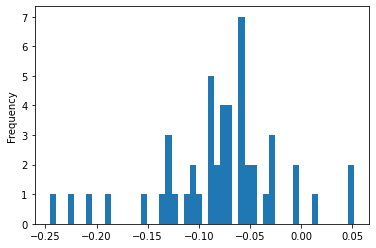

In [ ]:
change_table["Count Difference Rate"] = change_table["Count Difference"] /  change_table["Total Trading Day"]
change_table["Count Difference Rate"].plot.hist(bins=50)

I am also interested in companies who do not follow the pattern, which means their prices are more likely to increase. So I made a bit study of them as below.

In [ ]:
change_table.head()
odd_comps = list(change_table[change_table["Count Difference"] > 0]["Stock Code"])
odd_comps

['300759.SZ', '300661.SZ', '300207.SZ']

Let's see what are these companies using another API methods.

In [ ]:
# this works on IBM but not working on Chinese companies we investigate
url = 'https://www.alphavantage.co/query?function=OVERVIEW&symbol=IBM&apikey='+apikey
r = requests.get(url)
data = r.json()
data

{'200DayMovingAverage': '139.5',
 '50DayMovingAverage': '140.69',
 '52WeekHigh': '151.1',
 '52WeekLow': '100.73',
 'Address': '1 NEW ORCHARD ROAD, ARMONK, NY, US',
 'AnalystTargetPrice': '150',
 'AssetType': 'Common Stock',
 'Beta': '1.212',
 'BookValue': '24.48',
 'CIK': '51143',
 'Country': 'USA',
 'Currency': 'USD',
 'Description': 'International Business Machines Corporation (IBM) is an American multinational technology company headquartered in Armonk, New York, with operations in over 170 countries. The company began in 1911, founded in Endicott, New York, as the Computing-Tabulating-Recording Company (CTR) and was renamed International Business Machines in 1924. IBM is incorporated in New York. IBM produces and sells computer hardware, middleware and software, and provides hosting and consulting services in areas ranging from mainframe computers to nanotechnology. IBM is also a major research organization, holding the record for most annual U.S. patents generated by a business (a

In [ ]:
for comp in odd_comps:
  url = 'https://www.alphavantage.co/query?function=OVERVIEW&symbol='+comp+'&apikey='+apikey
  r = requests.get(url)
  data = r.json()
  print(data)

{}
{}
{}


The results are disappointing as the API does not have enough support for Chinese companies listed in China. But luckily, there is not too many companies, so what we will do is to manually check for them.

- 300896.SZ: Imeik Technology Dev, which is a a cosmetics company specialised in biomaterials development.

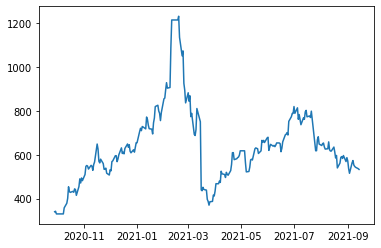

In [ ]:
# ['300896.SZ', '300782.SZ', '300748.SZ']
data1 = time_series_data_cal('300896.SZ')
plt.plot(data1["4. close"])

- 300782.SZ: Maxscend Technologies, which is chipmaker

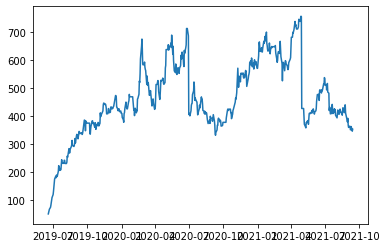

In [ ]:
# ['300896.SZ', '300782.SZ', '300748.SZ']
data1 = time_series_data_cal('300782.SZ')
plt.plot(data1["4. close"])

- 300748.SZ: JL Mag Rare-Earth Co, which is a manufacturer using rare-earth as raw materials

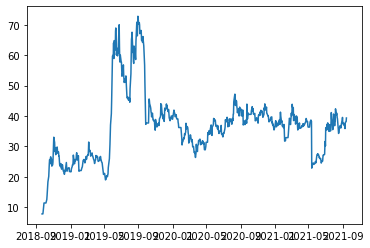

In [ ]:
# ['300896.SZ', '300782.SZ', '300748.SZ']
data1 = time_series_data_cal('300748.SZ')
plt.plot(data1["4. close"])

Interestingly, all these stocks have halved the peak price in the recent years.

After this, we might wonder what is the consequence of having a trading day reaching price limits. Let's assume 10-20% daily change to be reaching price limits. Then how many stocks does it happens to and how frequent does this happen?

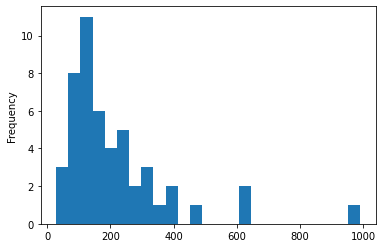

In [ ]:
peak_table = []
for num in range(len(price_list)):
  stock_code = company_list[num]
  price = price_list[num]
  total_trading_day = price["7. daily change rate"].count()
  peak_day = price[price["7. daily change rate"] > 0.1].index
  peak_day_count = price[price["7. daily change rate"] > 0.1]["7. daily change rate"].count()
  avg_peak_freq = total_trading_day/peak_day_count
  zip = [stock_code, peak_day, peak_day_count, avg_peak_freq]
  peak_table.append(zip)
peak_table = pd.DataFrame(peak_table)
peak_table.columns = ["Stock Code", "Peak Days", "Peak Day Count", "Avg Peak Frequency"]
peak_table["Avg Peak Frequency"].plot.hist(bins=25)

In [ ]:
peak_table["Avg Peak Frequency"].describe()

count     49.000000
mean     217.019390
std      173.498342
min       27.888889
25%      115.615385
50%      163.833333
75%      258.000000
max      991.333333
Name: Avg Peak Frequency, dtype: float64

In [ ]:
peak_table.head()

,Stock Code,Peak Days,Peak Day Count,Avg Peak Frequency
0,300001.SZ,"DatetimeIndex(['2021-06-21', '2021-01-07', '20...",16,193.437500
1,300037.SZ,"DatetimeIndex(['2021-09-07', '2021-09-06', '20...",22,138.500000
2,300595.SZ,"DatetimeIndex(['2020-06-04', '2017-01-17'], dt...",2,607.000000
3,300759.SZ,"DatetimeIndex(['2021-05-17', '2021-04-21', '20...",9,27.888889
4,300896.SZ,"DatetimeIndex(['2019-12-27', '2019-04-25'], dt...",2,311.500000


Interesting, all 50 stocks have undergone these limited days, and it usually takes more than half a year, or more exactly 214.5 days, to happen. This sounds very sparse but is it really the case? I doubt it. With all the dates, we may try to make a different check upon its frequency. For example, let us look a specific date list.


In [ ]:
print(peak_table["Stock Code"][25], peak_table["Peak Days"][25])

300003.SZ DatetimeIndex(['2017-02-13', '2016-12-07', '2016-03-17', '2016-03-11',
               '2016-01-14', '2015-11-04', '2015-11-02', '2015-10-27',
               '2015-10-22', '2015-10-20', '2015-10-13', '2015-09-21',
               '2015-09-08', '2015-07-23', '2015-07-09', '2015-06-23',
               '2015-05-07', '2015-05-05', '2015-01-21'],
              dtype='datetime64[ns]', freq=None)


In [ ]:
peak_table["Peak Days"][18]

DatetimeIndex(['2018-11-06', '2018-10-19', '2018-10-16'], dtype='datetime64[ns]', freq=None)

In [ ]:
peak_table["Peak Days"][29]

DatetimeIndex(['2021-01-27', '2021-01-07', '2020-12-25', '2020-07-06',
               '2020-05-06', '2020-02-12', '2018-07-11', '2018-06-22',
               '2017-11-28', '2017-10-26', '2017-10-20', '2017-09-18',
               '2017-07-05', '2017-03-06'],
              dtype='datetime64[ns]', freq=None)

It is interesting to know that some years, like 2015, 2018 and 2020-21 are more likely to see these peak days. And this phenomenon tends to happen within a short period like 1-2 months. When it happens, let us see how the price changes after the peaks happens twice in two month.

For example, we may see it happens on '2015-09-28', '2015-09-21', '2015-09-08' to the stock Hangzhou Tigermed (300347.SZ). Let's see what happen 1/2/3/4 months since 2015-09-08.

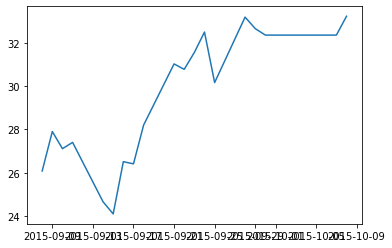

In [ ]:
data1 = time_series_data_cal('300347.SZ')
plt.plot(data1["4. close"]['2015-10-08':'2015-09-08'])

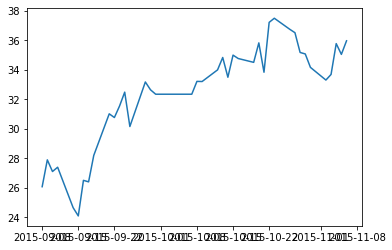

In [ ]:
plt.plot(data1["4. close"]['2015-11-08':'2015-09-08'])

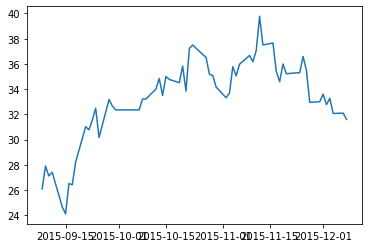

In [ ]:
plt.plot(data1["4. close"]['2015-12-08':'2015-09-08'])

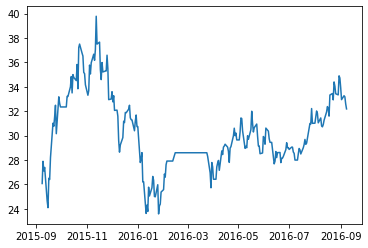

In [ ]:
plt.plot(data1["4. close"]['2016-09-08':'2015-09-08'])

Eventually we see after a year, all the increase is almost gone. The first one month growth constitutes most of the growth and you can still make some profits in the second or third months until a catastrophic decrease in Jan 2016. However, in the long term , the stock is good enough for all these decreases and we may see the overall trend of it.

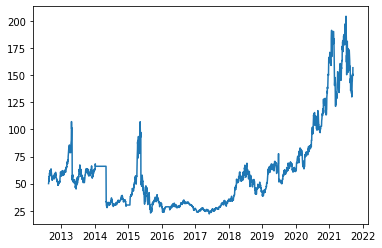

In [ ]:
plt.plot(data1["4. close"])

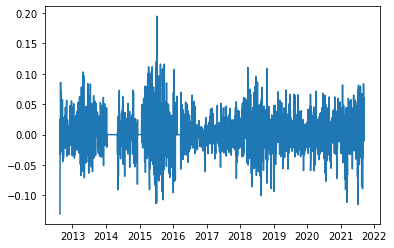

In [ ]:
plt.plot(data1["7. daily change rate"])

And here I am wondering whether we could make use of the interval between two peak time and set a threshold of attention. If we observe the price increase reaches limit twice in a month, we may investigate into the stock. It is possible we may still make a profit in the following months before it is too dangder not to pull out. 

In [ ]:
import csv
CSV_URL = 'https://www.alphavantage.co/query?function=LISTING_STATUS&state=active&apikey='+apikey
with requests.Session() as s:
    download = s.get(CSV_URL)
    decoded_content = download.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)

In [ ]:
listed_comp = pd.DataFrame(my_list)
listed_comp.columns = listed_comp.iloc[0]
listed_comp = listed_comp[listed_comp['assetType'] == "Stock"]

In [ ]:
listed_comp

,symbol,name,exchange,assetType,ipoDate,delistingDate,status
1,A,Agilent Technologies Inc,NYSE,Stock,1999-11-18,null,Active
2,AA,Alcoa Corp,NYSE,Stock,2016-11-01,null,Active
5,AAC,Ares Acquisition Corporation - Class A,NYSE,Stock,2021-03-25,null,Active
6,AAC-U,Ares Acquisition Corporation - Units (1 Ord Sh...,NYSE,Stock,2021-02-02,null,Active
7,AAC-WS,Ares Acquisition Corporation - Warrants (01/01...,NYSE,Stock,2021-03-25,null,Active
...,...,...,...,...,...,...,...
11466,ZYME,Zymeworks Inc,NYSE,Stock,2017-04-28,null,Active
11467,ZYNE,Zynerba Pharmaceuticals Inc,NASDAQ,Stock,2015-08-05,null,Active
11468,ZYXI,Zynex Inc,NASDAQ,Stock,2002-12-31,null,Active
11469,ZZK,,NYSE ARCA,Stock,2020-07-22,null,Active


In [ ]:
listed_comp["exchange"].value_counts()

NASDAQ       4636
NYSE         3422
NYSE MKT      261
NYSE ARCA      43
BATS            4
Name: exchange, dtype: int64

5 API requests per minute makes us unable to do this to all the stocks. Again, if I am to select stocks in the US market, I will choose NASDAQ 100.

In [ ]:
NASDAQ_100 = ['ZM','XLNX','XEL','WDAY','WBA','VRTX','VRSN','VRSK','TXN','TSLA',
              'TMUS','TEAM','TCOM','SWKS','SPLK','SNPS','SIRI','SGEN','SBUX',
              'ROST','REGN','QCOM','PYPL','PTON','PEP','PDD','PCAR','PAYX',
              'ORLY','OKTA','NXPI','NVDA','NTES','NFLX','MU','MTCH','MSFT',
              'MRVL','MRNA','MNST','MELI','MDLZ','MCHP','MAR','LULU','LRCX',
              'KLAC','KHC','KDP','JD','ISRG','INTU','INTC','INCY','ILMN','IDXX',
              'HON','GOOGL','GOOG','GILD','FOXA','FOX','FISV','FB','FAST',
              'EXC','EBAY','EA','DXCM','DOCU','DLTR','CTSH','CTAS','CSX',
              'CSCO','CRWD','CPRT','COST','CMCSA','CHTR','CHKP','CERN',
              'CDW','CDNS','BKNG','BIIB','BIDU','AVGO','ATVI','ASML','ANSS',
              'AMZN','AMGN','AMD','AMAT','ALGN','AEP','ADSK','ADP','ADI','ADBE','AAPL']

In [ ]:
import time
price_list_US = []
company_list_unchecked = NASDAQ_100
while len(company_list_unchecked) > 0:
  shortlist = company_list_unchecked[0:4]
  del company_list_unchecked[0:4]
  for comp in shortlist:
    try:
      price_list_US.append([[comp, time_series_data_cal(comp)]])
    except:
      print(comp)
  # this is because Alpha Vantage only allows 5 requests per minute
  time.sleep(60)
  continue

In [ ]:
price_list_US[1][0][1]

'XLNX'

In [ ]:
change_table2 = []
for price in price_list_US:
  stock_code = price[0][0]
  price = price[0][1]
  total_trading_day = price["7. daily change rate"].count()
  increase_count = price[price["7. daily change rate"] > 0]["7. daily change rate"].count()
  decrease_count = price[price["7. daily change rate"] <= 0]["7. daily change rate"].count()
  diff = increase_count - decrease_count
  zip = [stock_code, total_trading_day, increase_count, decrease_count, diff]
  change_table2.append(zip)
change_table2 = pd.DataFrame(change_table2)
change_table2.columns = ["Stock Code", "Total Trading Day", "Increase Count", "Decrease Count", "Count Difference"]
change_table2["Count Difference"].describe()

count    102.000000
mean      19.901961
std      164.082659
min     -807.000000
25%      -48.250000
50%       24.500000
75%      102.750000
max      445.000000
Name: Count Difference, dtype: float64

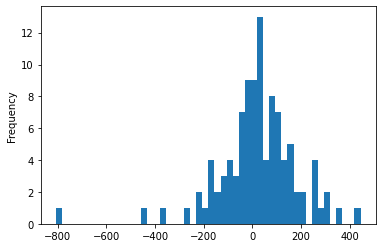

In [ ]:
change_table2["Count Difference"].plot.hist(bins=50)

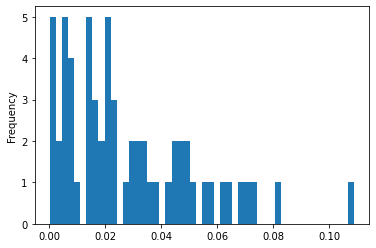

In [ ]:
change_table2["Count Difference Rate"] = change_table2["Count Difference"] /  change_table2["Total Trading Day"]
change_table2[change_table2["Count Difference Rate"] > 0]["Count Difference Rate"].plot.hist(bins=50)

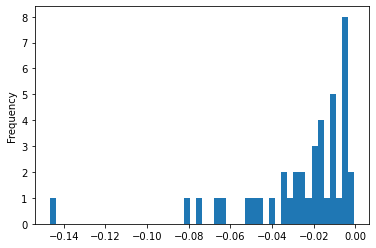

In [ ]:
change_table2[change_table2["Count Difference Rate"] <= 0]["Count Difference Rate"].plot.hist(bins=50)

In [ ]:
print(change_table2[change_table2["Count Difference Rate"] <= 0]["Count Difference Rate"].count(),
      change_table2[change_table2["Count Difference Rate"] > 0]["Count Difference Rate"].count())

41 61


However, what we observe as a rule in the Chinese stock market does not happen in the US stock market, or more specifically in the NASDAQ-100 stocks. 61 of the stocks see more days with increased prices then decreasd prices, which is totally differnet from what we see in the Chinese stock market. There has been a long-standing debates about the price formation mechanism in the China market due to the price limit. 

For example, [a study by a group of researchers at the Chinese University of Hong Kong](https://cbk.bschool.cuhk.edu.hk/do-daily-price-limits-stabilize-the-markets/) describe the pattern in the China market, where

> ......83.6 percent of large investors who buy upper-price-limit-hitting stocks on day 0 tend to sell them on day 1...... This finding strongly supports a key premise of our hypotheses that large investors are the ‘smart money’ in the market. The sharp contrast of their trading negatively predicting returns subsequent to hitting the upper price limit makes their destructive behaviour around these events even more striking......Our analysis provides a set of empirical findings to show that the widely adopted daily price limit rules may induce large investors as a group to pursue a destructive trading strategy of pushing prices to the upper price limit and then profiting from selling on the next day......

These partly explains why the stock prices in China are more likely to decrease in a day. But it still remains vague how prices are formed in a Chinese market. Of course the price limit is not the only factors, as we see that if the price continously reaches the limit, the stock price will still obtain strong momentum to grow in a few months to come. In this sense, the CUHK study is actually exaggrating the impact of price limit as it lacks benchmarks for comparisons and a self-reference study is not a good approach to assess stablity and stablisation.

Also, I am also interested in whether there is a pattern of post-peak pattern that can be measured by the interval between peak time, as I heard that some of the traders in China are utilising this as a quant strategy. Anyway, the data volume then would be too big for using free API provided by Alpha Vantage. And Tushare and other API could be of help in that case. 